In [1]:
import multiprocessing
from multiprocessing import Pool

In [2]:
print("Number of CPUs: ", multiprocessing.cpu_count())

Number of CPUs:  12


In [3]:
def HelloWorld(n, x, y):
    print(n)

In [4]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
import keras
import pandas

Using TensorFlow backend.


In [5]:
from keras.preprocessing import sequence
from keras.models import Sequential # necesario para poder generar la red neuronal
from keras.layers import Dense, Dropout, Activation, Lambda # Tipos de capa, hacen lo siguiente:
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten, LSTM
from keras.callbacks import CSVLogger # para guardar los datos en un excel
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

### ESTAS SON LAS CAPAS MAS IMPORTANTES
* **Dense**: La capa que mas se utiliza, de la siguiente manera ::  output = activation(dot(input, kernel)+bias) dot representa la operacion punto a punto de todos los inputs y sus correspondientes pesos
* **Dropout**: Se usa para resolver el problema de over-fitting, se intenta eliminar el ruido en esta capa
* **Activation**: capa de activacion
* **Lambda**: sirve para transformar los datos de entrada usando una expresión o una función
* **Embedding**: esta capa sirve para convertir a vectores de tamaño fijo
* **Convolution1D**: capa donde se realiza la convolucion
* **MaxPooling1D**: capa donde se realiza la operacion de pooling
* **Flatten**: capa donde se realiza la operacion de flatten (se puede usar para poner los datos en 1 sola dimension)

In [6]:
from keras.datasets import imdb # un dataset incluido en keras
from keras import backend as K # importas el backend (Tensorflow, Theano, etc)
import pandas as pd # pandas es una libreria extension de numpy usada para manipulacion y analisis de datos, para manipular tablas numericas y series temporales

In [7]:
from keras.utils.np_utils import to_categorical # sirve para convertir vectores de enteros a una matriz de clases binaria, por ejemplo:

 a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
 
                     [1, 0, 0, 0]
                     [0, 1, 0, 0]
                     [0, 0, 1, 0]
                     [0, 0, 0, 1]

In [8]:
import h5py # para almacenar un monton de datos numericos y dar facilidades de manipulacion para datos de Numpy

In [9]:
from sklearn.preprocessing import Normalizer # Para normalizar los datos
from sklearn.model_selection import train_test_split #para hacer la separacion entre datos de test y train
from sklearn.preprocessing import OneHotEncoder #para convertir los datos de entrada

In [14]:
dataset = pd.read_csv('dataset/DoS/DoS_WITHOUT_Thuesday-20-02-2018.csv') # lectura de datos

In [15]:
dataset['Label'].unique()

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk', 'Label',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'], dtype=object)

In [11]:
dataset["Label"].value_counts()

Benign           238037
Infilteration     93063
Label                25
Name: Label, dtype: int64

In [12]:
dataset.shape #comprobamos el tamaño

(331125, 80)

In [13]:
#Eliminamos los datos mal introducidos
dataset = dataset.drop(dataset[dataset['Dst Port']=='Dst Port'].index)

## Eliminamos la columnaTimestamp

In [14]:
#Eliminamos la columna
dataset = dataset.drop(['Timestamp'], axis=1)

In [15]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331100 entries, 0 to 331111
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Dst Port           331100 non-null  object
 1   Protocol           331100 non-null  object
 2   Flow Duration      331100 non-null  object
 3   Tot Fwd Pkts       331100 non-null  object
 4   Tot Bwd Pkts       331100 non-null  object
 5   TotLen Fwd Pkts    331100 non-null  object
 6   TotLen Bwd Pkts    331100 non-null  object
 7   Fwd Pkt Len Max    331100 non-null  object
 8   Fwd Pkt Len Min    331100 non-null  object
 9   Fwd Pkt Len Mean   331100 non-null  object
 10  Fwd Pkt Len Std    331100 non-null  object
 11  Bwd Pkt Len Max    331100 non-null  object
 12  Bwd Pkt Len Min    331100 non-null  object
 13  Bwd Pkt Len Mean   331100 non-null  object
 14  Bwd Pkt Len Std    331100 non-null  object
 15  Flow Byts/s        329266 non-null  object
 16  Flow Pkts/s        3

In [16]:
n=0
for column in dataset:
    column
    if column != 'Label':
        dataset[column] = dataset[column].astype(float)

In [17]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331100 entries, 0 to 331111
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           331100 non-null  float64
 1   Protocol           331100 non-null  float64
 2   Flow Duration      331100 non-null  float64
 3   Tot Fwd Pkts       331100 non-null  float64
 4   Tot Bwd Pkts       331100 non-null  float64
 5   TotLen Fwd Pkts    331100 non-null  float64
 6   TotLen Bwd Pkts    331100 non-null  float64
 7   Fwd Pkt Len Max    331100 non-null  float64
 8   Fwd Pkt Len Min    331100 non-null  float64
 9   Fwd Pkt Len Mean   331100 non-null  float64
 10  Fwd Pkt Len Std    331100 non-null  float64
 11  Bwd Pkt Len Max    331100 non-null  float64
 12  Bwd Pkt Len Min    331100 non-null  float64
 13  Bwd Pkt Len Mean   331100 non-null  float64
 14  Bwd Pkt Len Std    331100 non-null  float64
 15  Flow Byts/s        329266 non-null  float64
 16  Fl

In [18]:
#revisamos cuantos valores puede tener la ultima columna, osea, los tipos de flujo
Labels = dataset['Label'].unique()
Labels #para asignar nombres a las diferentes metricas en un futuro

array(['Benign', 'Infilteration'], dtype=object)

In [19]:
Y = dataset["Label"]

In [20]:
dataset["Label"].value_counts()

Benign           238037
Infilteration     93063
Name: Label, dtype: int64

In [21]:
# Replacing infinite and nan 
dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

# Printing df 
dataset.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,0.0,115307855.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1812348.0,0.0,1812348.0,1812348.0,56700000.0,6.010058e+06,61000000.0,52500000.0,Benign
1,0.0,0.0,60997457.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,61000000.0,0.000000e+00,61000000.0,61000000.0,Benign
2,67.0,17.0,61149019.0,5.0,0.0,1500.0,0.0,300.0,300.0,300.0,...,8.0,3530939.0,0.0,3530939.0,3530939.0,19200000.0,1.250000e+07,32600000.0,7999725.0,Benign
3,0.0,0.0,60997555.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,61000000.0,0.000000e+00,61000000.0,61000000.0,Benign
4,0.0,0.0,61997503.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,999909.0,0.0,999909.0,999909.0,61000000.0,0.000000e+00,61000000.0,61000000.0,Benign


In [22]:
dataset["Label"].value_counts()

Benign           238037
Infilteration     93063
Name: Label, dtype: int64

In [23]:
dataset.head

<bound method NDFrame.head of         Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0            0.0       0.0    115307855.0           5.0           0.0   
1            0.0       0.0     60997457.0           2.0           0.0   
2           67.0      17.0     61149019.0           5.0           0.0   
3            0.0       0.0     60997555.0           2.0           0.0   
4            0.0       0.0     61997503.0           3.0           0.0   
...          ...       ...            ...           ...           ...   
331107       0.0       0.0    118494070.0          31.0           0.0   
331108    2634.0       6.0       114340.0           2.0           1.0   
331109    3389.0       6.0      1404866.0           8.0           7.0   
331110    3389.0       6.0      3966663.0          14.0           7.0   
331111   53092.0       6.0     86637706.0           2.0           0.0   

        TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0              

In [24]:
#ahora que hemos conseguido transformar estas columnas a numeros, podemos empezar con la red neuronal
#necesitamos un grupo de train y otro de test para la red neuronal, los crearemos con train_test_split
X=dataset.iloc[:, 0:78]
X.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.0,0.0,115307855.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1812348.0,0.0,1812348.0,1812348.0,56700000.0,6.010058e+06,61000000.0,52500000.0
1,0.0,0.0,60997457.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,61000000.0,0.000000e+00,61000000.0,61000000.0
2,67.0,17.0,61149019.0,5.0,0.0,1500.0,0.0,300.0,300.0,300.0,...,4.0,8.0,3530939.0,0.0,3530939.0,3530939.0,19200000.0,1.250000e+07,32600000.0,7999725.0
3,0.0,0.0,60997555.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,61000000.0,0.000000e+00,61000000.0,61000000.0
4,0.0,0.0,61997503.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,999909.0,0.0,999909.0,999909.0,61000000.0,0.000000e+00,61000000.0,61000000.0


In [25]:
y_converted = []
y_np= np.array(Y)
for n in range(0,y_np.size):
    for l in range(0,Labels.size):
        if y_np[n] == Labels[l]:
            y_converted.append(l)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_converted)

In [27]:
#volvemos a copiar su codigo:
scaler = Normalizer().fit(X_train) # Normalizamos los datos
trainX = scaler.transform(X_train) # Asi se representan los datos

scaler = Normalizer().fit(X_test)
testT = scaler.transform(X_test)

y_train1 = np.array(Y_train) # sirve para crear un array en numpy
y_test1 = np.array(Y_test)


y_train= to_categorical(y_train1) # para convertir los datos a clase binaria
y_test= to_categorical(y_test1)

In [28]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1)) # cambias la forma de X_train para que sea del mismo tamaño que trainX
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))

In [29]:
#creamos la red neuronal
lstm_output_size = 70

Infilteration = Sequential()
Infilteration.add(Convolution1D(64, 3, activation="relu",input_shape=(78, 1), padding = 'same'))
#######
#   Añadimos la primera capa de Convolution1D, los diferentes parametros indican lo siguiente:
#       64 --> numero de filtros
#       3 --> tamaño del filtro (3,1)
#       border_mode = "same" --> este parametro sirve para que el output sea del mismo tamaño que elinput
#       activation = "relu" --> Tipo de funcion de activacion de neuronas que vamos a usar
#       input_shape = (79, 1) --> tamaño de la entrada, hay 79 features
#######
Infilteration.add(Convolution1D(64, 3, activation="relu", padding = 'same'))
Infilteration.add(MaxPooling1D(pool_size=(2))) # capa donde se lleva a cabo el pooling, se queda con el maximo de cada 2
Infilteration.add(Convolution1D(128, 3,  activation="relu", padding = 'same'))
Infilteration.add(Convolution1D(128, 3,  activation="relu", padding = 'same'))
Infilteration.add(MaxPooling1D(pool_size=(2)))
Infilteration.add(LSTM(lstm_output_size)) # Se añade una LSTM como segunda red
Infilteration.add(Dropout(0.1)) #
Infilteration.add(Dense(2, activation="softmax")) # capa fully conected para decision final, usamos softmax porque con ella los valores finales tienen mas relacion con los valores
# anteriores y no solo con 1

In [30]:
#creamos la red neuronal
lstm_output_size = 70

Bruteforce = Sequential()
Bruteforce.add(Convolution1D(64, 3, activation="relu",input_shape=(78, 1), padding = 'same'))
#######
#   Añadimos la primera capa de Convolution1D, los diferentes parametros indican lo siguiente:
#       64 --> numero de filtros
#       3 --> tamaño del filtro (3,1)
#       border_mode = "same" --> este parametro sirve para que el output sea del mismo tamaño que elinput
#       activation = "relu" --> Tipo de funcion de activacion de neuronas que vamos a usar
#       input_shape = (79, 1) --> tamaño de la entrada, hay 79 features
#######
Bruteforce.add(Convolution1D(64, 3, activation="relu", padding = 'same'))
Bruteforce.add(MaxPooling1D(pool_size=(2))) # capa donde se lleva a cabo el pooling, se queda con el maximo de cada 2
Bruteforce.add(Convolution1D(128, 3,  activation="relu", padding = 'same'))
Bruteforce.add(Convolution1D(128, 3,  activation="relu", padding = 'same'))
Bruteforce.add(MaxPooling1D(pool_size=(2)))
Bruteforce.add(LSTM(lstm_output_size)) # Se añade una LSTM como segunda red
Bruteforce.add(Dropout(0.1)) #
Bruteforce.add(Dense(6, activation="softmax")) # capa fully conected para decision final, usamos softmax porque con ella los valores finales tienen mas relacion con los valores
# anteriores y no solo con 1

In [31]:
# define optimizer and objective, compile cnn
Infilteration.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy']) # se compila la red neuronal con los siguientes parametros:
Bruteforce.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy']) # se compila la red neuronal con los siguientes parametros:
######
#   PARAMETROS:
#       loss = "categorical_crossentropy" --> esta relacionado con la funcion softmax, se usa para dar una probabilidad sobre unas clases
#       optimizer = "adam" --> Stochastic gradient descent
#       metrics = 'accuracy' --> compara los resultados finales con los reales y de ahi saca las estadisticas
######

# TRAIN

In [35]:
print(__name__)
salidas = []

__main__


In [42]:
def Prediccion(option, input_N, ruta):
    print("hola")
    if (option==0):
        #Cargamos los resultados obtenidos en la etapa de train
        print("loading Infilteration weigths...")
        Infilteration.load_weights(ruta)    
        print("Infilteration weigths loaded") 
        #predecimos la naturaleza de los paquetes de test
        y_pred_infilt = Infilteration.predict_classes(input_N)
        print("Infilteration prediction: \n", y_pred_infilt)

    elif(option==1):
        #Cargamos los resultados obtenidos en la etapa de train
        print("loading Bruteforce weigths...")
        Bruteforce.load_weights(ruta)
        print("Bruteforce weigths loaded")
        #predecimos la naturaleza de los paquetes de test
        y_pred_brute = Bruteforce.predict_classes(input_N)
        print("Bruteforce prediction: \n", y_pred_brute)

In [49]:
salidas =[]
processes = []
networks = ["resultados/cuarto_entrenamiento/Infiteration/checkpoints/checkpoint-12.hdf5", "resultados/cuarto_entrenamiento/BruteForce/checkpoints/checkpoint-11.hdf5"]
input_NN= X_test[35:36]

if __name__ == '__main__':
    for i in range(2):
        p = multiprocessing.Process(target=Prediccion,args=(i,input_NN, networks[i]))
        p.start()
        processes.append(p)

    # Now you can wait for the networks to finish training before executing the 
    # rest of the script
    for process in processes:
        process.join()

In [50]:

print(y_pred_brute)

[5 5 5 5 5]


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="resultados/cuarto_entrenamiento/Infilteration/checkpoints/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='accuracy',mode='max')
######
#   ModelCheckpoint se usa para guardar datos o pesos en algun momento de forma que estos puedan ser cargados o examinados en un futuro
#   PARAMETROS:
#       filepath --> direccion donde se va a guardar el archivo
#       verbose = 1 --> para ver una barra de progreso de la operacion
#       save_best_only = True --> se guarda solo si los datos son mejores que los anteriores, en este caso como la metrica de evaluacion de la red es accuracy se mide con eso
#       monitor --> lo que hay que monitorear
#       mode --> segun este parametro se tomara la decision de cuando sobreescribir y cuando no, en este caso como esta indicado max, se sobreescribe cuando el valor de monitor es mayor
######

In [ ]:
csv_logger = CSVLogger('resultados/cuarto_entrenamiento/Infilteration/modeltrainanalysis15epochs.csv',separator=',', append=False)
######
#   CSVLogger sirve para guardar los datos en un fichero CSV
#   PARAMETROS:
#       filename --> nombre y direccion del archivo
#       separator --> como se separan los resultados en el csv
#       append = false --> con esta opcion se sobreescribe lo que hubiese en el archivo destino, si fuese "True" se concatenaria
######

In [ ]:
model.fit(X_train, y_train, epochs=15,callbacks=[checkpointer,csv_logger])
######
#   cnn.fit es la  instruccion con la que se entrena la red neuronal
######
model.save("resultados/cuarto_entrenamiento/Infilteration/saved_model.hdf5")

Epoch 1/15
708128/708128 [==============================] - 404s 570us/step - loss: 0.4490 - accuracy: 0.8287

Epoch 00001: accuracy improved from -inf to 0.82866, saving model to resultados/cuarto_entrenamiento/Infilteration/checkpoints/checkpoint-01.hdf5
Epoch 2/15
708128/708128 [==============================] - 404s 571us/step - loss: 0.4437 - accuracy: 0.8287

Epoch 00002: accuracy improved from 0.82866 to 0.82871, saving model to resultados/cuarto_entrenamiento/Infilteration/checkpoints/checkpoint-02.hdf5
Epoch 3/15
708128/708128 [==============================] - 405s 572us/step - loss: 0.4429 - accuracy: 0.8288

Epoch 00003: accuracy improved from 0.82871 to 0.82879, saving model to resultados/cuarto_entrenamiento/Infilteration/checkpoints/checkpoint-03.hdf5
Epoch 4/15
708128/708128 [==============================] - 403s 569us/step - loss: 0.4421 - accuracy: 0.8287

Epoch 00004: accuracy did not improve from 0.82879
Epoch 5/15
708128/708128 [==============================] - 4

# Test

In [ ]:
X_test[0].size

78

In [ ]:
#Cargamos los resultados obtenidos en la etapa de train
Infilteration.load_weights("/Infiltracion.hdf5")

#predecimos la naturaleza de los paquetes de test
y_pred = Infilteration.predict([X_test[0], X_test[1]])

print(y_pred)


ValueError: ignored

## Métricas de evaluación

In [ ]:
dataset["Label"].value_counts()

Benign           238037
Infilteration     93063
Name: Label, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred,target_names=Labels, digits=8, zero_division= "warn"))

NameError: ignored

# Representaciones
----
## Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred)

array([[194954,    362],
       [ 40361,    366]], dtype=int64)

In [ ]:
# Normalized confusion matrix
confusion_matrix(y_test1, y_pred, normalize='true')

array([[0.99814659, 0.00185341],
       [0.99101333, 0.00898667]])

In [ ]:
y_test1_text = []
for i in range(0, y_test1.size):
    for j in range(0, Labels.size):
        if y_test1[i] == j:
            y_test1_text.append(Labels[j])

In [ ]:
y_pred_text = []
for i in range(0, y_pred.size):
    for j in range(0, Labels.size):
        if y_pred[i] == j:
            y_pred_text.append(Labels[j])

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

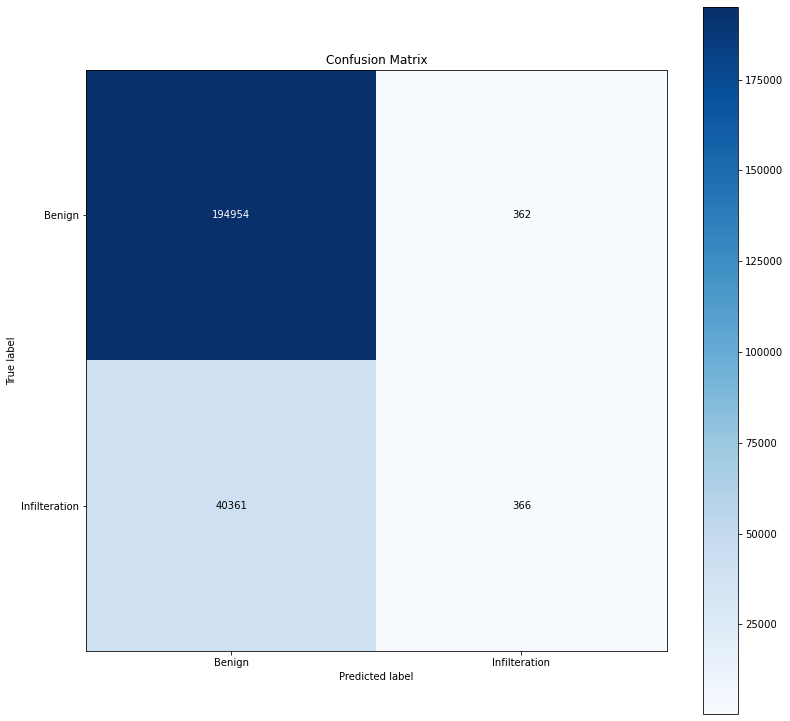

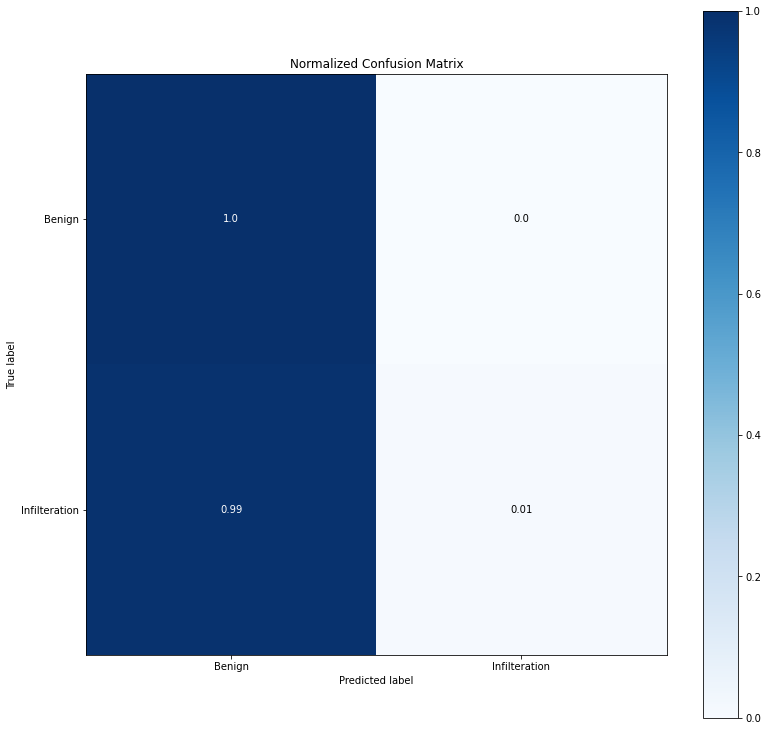

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (13,13))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (13,13))

## ROC

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib as plt
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test1, y_pred)
plt.plot(fpr_keras, tpr_keras, label='CNN + LSTM')
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

AttributeError: module 'matplotlib' has no attribute 'plot'